# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

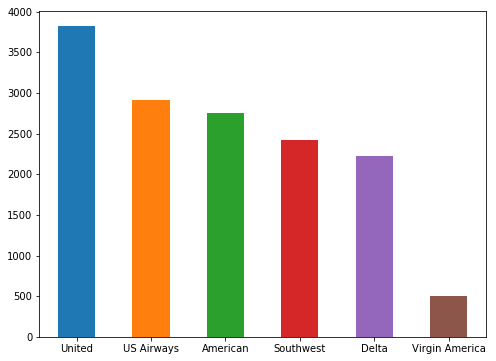

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

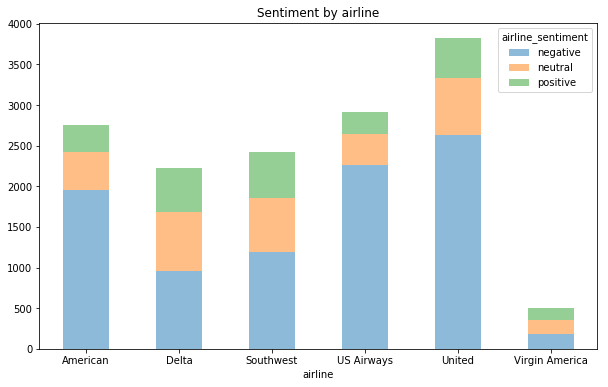

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
X_train.head()

tweet_id
568195829238005760    @united makes total sense, except flight wasn'...
568385676737167360                                     @JetBlue Thanks!
569606135960858624    @AmericanAir I've been trying to change frm AA...
569202656486432768    @united great decision making skills flight op...
570231750959329280    @JetBlue your blue helped bring out the color ...
Name: text, dtype: object

In [72]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_train_ft = vect.fit_transform(X_train)

In [73]:
X_train_ftd=X_train_ft.todense()

In [74]:
X_train_ftd.shape

(7320, 10214)

In [75]:
X_train_ftd[:,:10]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
vect.vocabulary_

{'united': 9506,
 'makes': 5874,
 'total': 9154,
 'sense': 8118,
 'except': 3727,
 'flight': 4006,
 'wasn': 9814,
 'full': 4249,
 've': 9678,
 'got': 4441,
 'empty': 3584,
 'seats': 8071,
 'around': 1564,
 'me': 5976,
 'amp': 1407,
 'overheads': 6749,
 'were': 9874,
 'more': 6194,
 'than': 8942,
 'half': 4565,
 'open': 6645,
 'when': 9896,
 'boarded': 1994,
 'jetblue': 5265,
 'thanks': 8947,
 'americanair': 1390,
 'been': 1850,
 'trying': 9273,
 'to': 9110,
 'change': 2391,
 'frm': 4213,
 'aa': 1070,
 '2401': 377,
 'lax': 5537,
 'at': 1623,
 '50am': 724,
 'monday': 6173,
 'morning': 6196,
 'then': 8973,
 '2586': 396,
 'from': 4215,
 'fat': 3868,
 '1359': 138,
 'helpaa': 4680,
 'great': 4473,
 'decision': 3062,
 'making': 5877,
 'skills': 8320,
 'ops': 6664,
 'iah': 4893,
 'bag': 1756,
 '10': 38,
 'minute': 6114,
 'connection': 2735,
 'and': 1420,
 'don': 3360,
 'pushed': 7347,
 'early': 3493,
 'disappointed': 3245,
 'your': 10152,
 'blue': 1984,
 'helped': 4681,
 'bring': 2090,
 'out':

In [76]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_ftd.shape

(7320, 10214)

In [77]:
y_train.shape

(7320,)

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [79]:
pd.Series(cross_val_score(clf, X_train_ftd, y_train, cv=10)).describe()

count    10.000000
mean      0.716112
std       0.012977
min       0.695355
25%       0.711551
50%       0.713310
75%       0.718633
max       0.738063
dtype: float64

In [80]:
# list of values to try for n_estimators
estimator_range = range(10, 200, 20)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train_ftd, y_train, cv=5, scoring='accuracy').mean())

Text(0,0.5,'Accuracy')

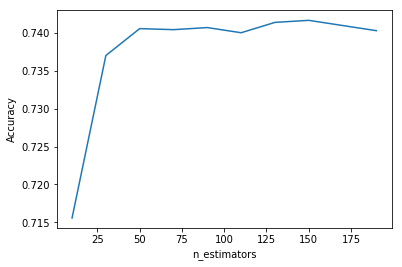

In [81]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [82]:
print(accuracy_scores)

[0.7155705305781489, 0.7370212450978734, 0.7405705447379417, 0.740434027497399, 0.7407091184651377, 0.7400259651053211, 0.7413920860892946, 0.741663722577871, 0.7409803819516068, 0.7402985348645605]


##### Pronostico y evaluación del accuracy

In [83]:
X_test_ft = vect.fit_transform(X_test)
X_test_ftd=X_test_ft.todense()
X_test_ftd.shape

(7320, 10035)

In [84]:
X_test_ftd[:,:10]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
y_test.head(5)

tweet_id
569731104070115329    1
569263373092823040   -1
568818669024907264   -1
567775864679456768    0
568526521910079488   -1
Name: airline_sentiment, dtype: int64

In [86]:
clf.fit(X_test_ftd, y_test)
pd.Series(cross_val_score(clf, X_test_ftd, y_test, cv=10)).describe()

count    10.000000
mean      0.752464
std       0.007917
min       0.739427
25%       0.747777
50%       0.753246
75%       0.756396
max       0.766074
dtype: float64

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [48]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [49]:
# use CountVectorizer to create document-term matrices from X
X_train_ft = vect.fit_transform(X_train)
X_train_ftd=X_train_ft.todense()

In [50]:
X_train_ftd.shape

(7320, 9940)

In [51]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
accuracy_scores=cross_val_score(clf, X_train_ftd, y_train, cv=5, scoring='accuracy').mean()

In [52]:
print(accuracy_scores)

0.7342932024652123


In [56]:
X_test_ft = vect.fit_transform(X_test)
X_test_ftd=X_test_ft.todense()
X_test_ftd.shape

(7320, 9766)

In [57]:
clf.fit(X_test_ftd, y_test)
pd.Series(cross_val_score(clf, X_test_ftd, y_test, cv=10)).describe()

count    10.000000
mean      0.745081
std       0.014713
min       0.726402
25%       0.738063
50%       0.741121
75%       0.755123
max       0.772914
dtype: float64

# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

 ### n gramas de 1 a 3 es suficiente

In [14]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(stop_words='english',ngram_range=(1, 3), max_features=30000)

In [43]:
# use CountVectorizer to create document-term matrices from X
X_train_ft = vect.fit_transform(X_train)
X_train_ft.shape

#X_train_ftd=X_train_ft.todense()

(7320, 30000)

In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
accuracy_scores=cross_val_score(clf, X_train_ft, y_train, cv=5, scoring='accuracy').mean()

In [45]:
print(accuracy_scores)

0.7299232034074125


In [46]:
X_test_ft = vect.fit_transform(X_test)
X_test_ftd=X_test_ft.todense()
X_test_ftd.shape

(7320, 30000)

In [47]:
clf.fit(X_test_ftd, y_test)
pd.Series(cross_val_score(clf, X_test_ftd, y_test, cv=10)).describe()

count    10.000000
mean      0.748907
std       0.011164
min       0.727770
25%       0.742321
50%       0.750000
75%       0.757011
max       0.766074
dtype: float64

# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [50]:
# TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=30000)
X_train_ftd=pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())

In [51]:
X_train_ftd.shape

(7320, 30000)

In [52]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
accuracy_scores=cross_val_score(clf, X_train_ftd, y_train, cv=5, scoring='accuracy').mean()

In [53]:
print(accuracy_scores)

0.7292352850859954


In [54]:
X_test_ftd=pd.DataFrame(vect.fit_transform(X_test).toarray(), columns=vect.get_feature_names())
X_test_ftd.shape

(7320, 30000)

In [55]:
clf.fit(X_test_ftd, y_test)
pd.Series(cross_val_score(clf, X_test_ftd, y_test, cv=10)).describe()

count    10.000000
mean      0.741118
std       0.012351
min       0.727770
25%       0.732856
50%       0.736340
75%       0.747357
max       0.763984
dtype: float64

 #### En general no existen grandes cambios en la precisión de los modelos (entre 74% y 75%) , ni en los tiempos de ejecución de los mismos